# Find the Best Location for a new Coffee Shop in Mount Pleasant, SC
# Introduction
Several coffee shop options exist for residents of Mount Pleasant, SC including well known coffee franchise shops to single-store coffee shops.  Coffee consumers in Mount Pleasant include those looking for a quick cup of coffee "on the go" to those who want a location to conduct business (w/wifi) while enjoying a good cup of coffee.  Since so many coffee consumers exist in Mount Pleasant, this project involves identification of potential new locations that current or new coffee shop owners might consider for attracting more coffee consumers. 
# Business Problem
Finding the best location for new coffee shop in Mount Pleasant, the fourth largest city in SC (by population of approximately 95,000 people) is based on several factors. Mount Pleasant has over 175 neighborhoods within the vicinity of essentially two major thoroughfares, Highway 17 and Coleman Boulevard. Both the neighborhoods of Mount Pleasant and access are different regarding factors that can directly or indirectly affect business success. For example, many businesses along Highway 17 are only accessible from offroads that parallell Highway 17 in both directions. For Coleman Boulevard, businesses along this stretch may have parking limitations. To make an informed decision for the best location(s) for a new coffee shop, it is essential to evaluate the neighborhoods, accessibiity, demand, and the current competitors. Lease costs also need to be considered, especially for small businesses.

For this project, the goal is to help a client find the best location(s) in Mount Pleasant to open a new coffee shop. Servicing coffee consumers, whether "on the go" or dining in near their neighborhoods or that have ease of accessibility, have fewer competitors, and is affordable will improve the client's chances for success. A coffee shop that can serve customers during the morning rush or those who need an offsite place to work will have better chances to succeed. Also, locating in areas with fewer competitors will reduce risks and improve sales in order for the client to start and grow the business.

# Data Description
Several data sources and tools will be needed to conduct the analysis of best location(s) for a new coffee shop in Mount Pleasant, SC.  These include:

- BeautifulSoup will be used with a Charleston real estate website to extract the neighborhoods:
https://www.buyingcharlestonrealestate.com/mount-pleasant-neighborhoods.php

- Geopy will be used to determine the coordinates of the negihborhoods.

- Foursquare will be used to identify and quantify existing coffeeshops in proximity to the neighborhoods; these results will be used later to prioritize which neighborhoods are least to best served (least served will influence potential locations).

- Folium will be used to plot feature data sets that contain GPS coordinates (e.g., Mount Pleasant neighborhoods and coffee shops)



In [1]:
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

# List of Mount Pleasant Neighborhoods
Use Beautifulsoup to get list of neighborhoods from a regional real estate website that lists Mount Plesant neighborhoods using HTML list tags (i.e., "li" tag). We need to know where neighborhoods are so we can compare these locations to existing coffee shop locations. This will inform us where the areas in Mount Pleasant are that might be underserved w.r.t. coffee shop options.

In [2]:
# Site for list scraping 
my_url = "https://www.buyingcharlestonrealestate.com/mount-pleasant-neighborhoods.php"

# Open connection and grab the page
uClient = uReq(my_url)

# Save contents to variable
page_html = uClient.read()

# Close connection
uClient.close()

# HTML parsing
page_soup = soup(page_html, "html.parser")

# Checking the list
page_soup.ol

# Create list of MP neighborhoods
listofMPneighborhoods = [li.text for li in page_soup.findAll('li')]

# Create datafram of MP Neighborhoods
df = pd.DataFrame(listofMPneighborhoods)
df2 = df[40:118]
df2.rename( columns={0:'neighborhoodstmp'}, inplace=True )
df2 =df2.reset_index()
del df2['index'] #reindex neighborhood records

# Add city and state for geopy geocoding
df2['neighborhoods'] = df2['neighborhoodstmp'] + ', Mount Pleasant, SC'
del df2['neighborhoodstmp']

# Check for list of neighborhoods
print(df2)
df2.head()

                             neighborhoods
0         Alston Point, Mount Pleasant, SC
1     Back Bay Village, Mount Pleasant, SC
2        Bayview Acres, Mount Pleasant, SC
3           Belle Hall, Mount Pleasant, SC
4         Bentley Park, Mount Pleasant, SC
..                                     ...
73  Sweetgrass Village, Mount Pleasant, SC
74      Wakendaw Lakes, Mount Pleasant, SC
75         Wando Lakes, Mount Pleasant, SC
76           Watermark, Mount Pleasant, SC
77         Waters Edge, Mount Pleasant, SC

[78 rows x 1 columns]


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,neighborhoods
0,"Alston Point, Mount Pleasant, SC"
1,"Back Bay Village, Mount Pleasant, SC"
2,"Bayview Acres, Mount Pleasant, SC"
3,"Belle Hall, Mount Pleasant, SC"
4,"Bentley Park, Mount Pleasant, SC"


# GPS Coordinates of Mount Pleasant Neighborhoods
Use Geopy to get the coordinates of the list of neighborhoods previously developed from a regional real estate website that lists Mount Plesant neighborhoods. The coordinates of neighborhoods will be used with algorithms later to compute the relative distances and denisities of coffee shops w.r.t. neighborhoods

In [3]:
# Use geopy to get neighborhood coordinates

# Create geopy locator
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="default")

# Function to get latitude
def get_latitude(x):
  if hasattr(x,'latitude') and (x.latitude is not None): 
     return x.latitude

# Funcition to get longitude
def get_longitude(x):
  if hasattr(x,'longitude') and (x.longitude is not None): 
     return x.longitude

# Initialize lat-lon values
df2['latitude'] = 'None'
df2['longitude'] = 'None'

# Get lat-lon values for neighborhoods
for i in range (0,77):
    location = df2.neighborhoods[i]
    df2.latitude[i]=get_latitude(geolocator.geocode(location))
    df2.longitude[i]=get_longitude(geolocator.geocode(location))

# Check outputs from geopy for lat-lon values by neighborhood
pd.set_option('display.max_rows', 78)
print(df2) 
df2.head()

                                        neighborhoods latitude longitude
0                    Alston Point, Mount Pleasant, SC     None      None
1                Back Bay Village, Mount Pleasant, SC  51.0065  -2.28742
2                   Bayview Acres, Mount Pleasant, SC  32.7954  -79.8909
3                      Belle Hall, Mount Pleasant, SC     None      None
4                    Bentley Park, Mount Pleasant, SC     None      None
5            Brickyard Plantation, Mount Pleasant, SC     None      None
6              Brookgreen Meadows, Mount Pleasant, SC     None      None
7                      Carol Oaks, Mount Pleasant, SC     None      None
8                   Carolina Park, Mount Pleasant, SC  35.3993  -80.4359
9                     Center Lake, Mount Pleasant, SC  54.3005 -0.449259
10               Chadbury Village, Mount Pleasant, SC     None      None
11            Charleston National, Mount Pleasant, SC  32.7941  -79.8626
12                   Chelsea Park, Mount Pleasant, 

,neighborhoods,latitude,longitude
0,"Alston Point, Mount Pleasant, SC",None,None
1,"Back Bay Village, Mount Pleasant, SC",51.0065,-2.28742
2,"Bayview Acres, Mount Pleasant, SC",32.7954,-79.8909
3,"Belle Hall, Mount Pleasant, SC",None,None
4,"Bentley Park, Mount Pleasant, SC",None,None


# Data Cleanup
Geopy did a great job of providing many GPS neighborhood coordinates.  However, as commone with data ETL, some cleanup is required.  The next steps involved exporting the Geopy dataframe outputs to a CSV file, then cleaning this file up.  Cleanup involved checking, fixing erroneous coordinates, and filling in blank coordinates.  Blank coordinates were determined from a variety of manual checks using various searches of neighborhood names and mapping websites.  Some neighborhoods were either too new or small that explains why Geopy may not have picked these up correctly.

In [4]:
# Save the working dataframe as a CSV file 
csv_data = df2.to_csv('coord-pass1.csv', index = True) 
print('\nCSV String:\n', csv_data)


CSV String:
 None


In [5]:
# Import cleaned data with complete and correct GPS coordinates of neighborhoods
df3 = pd.read_csv('coord-pass2.csv')
print(df3)
df3.head()
# We will plot the neighborhoods on a map after installing folium below.

    Unnamed: 0                                      neighborhoods   latitude  \
0            0                   Alston Point, Mount Pleasant, SC  32.845053   
1            1               Back Bay Village, Mount Pleasant, SC  32.829698   
2            2                  Bayview Acres, Mount Pleasant, SC  32.795410   
3            3                     Belle Hall, Mount Pleasant, SC  32.843173   
4            4                   Bentley Park, Mount Pleasant, SC  32.833038   
5            5           Brickyard Plantation, Mount Pleasant, SC  32.857241   
6            6             Brookgreen Meadows, Mount Pleasant, SC  32.792679   
7            7                     Carol Oaks, Mount Pleasant, SC  32.868165   
8            8                  Carolina Park, Mount Pleasant, SC  32.883945   
9            9                    Center Lake, Mount Pleasant, SC  32.782888   
10          10               Chadbury Village, Mount Pleasant, SC  32.838736   
11          11            Charleston Nat

,Unnamed: 0,neighborhoods,latitude,longitude
0,0,"Alston Point, Mount Pleasant, SC",32.845053,-79.854121
1,1,"Back Bay Village, Mount Pleasant, SC",32.829698,-79.806596
2,2,"Bayview Acres, Mount Pleasant, SC",32.795410,-79.890948
3,3,"Belle Hall, Mount Pleasant, SC",32.843173,-79.859902
4,4,"Bentley Park, Mount Pleasant, SC",32.833038,-79.805575


# Mount Pleasant Coffee Shop¶
The next piece of information we need is to know where the current coffee shops are in Mount Pleasant, SC. We'll use this informaiton later to determine the relative distance and density of coffee shop to neighborhoods in Mount Pleasant, which will inform where new locations might be targeted. We'll use Foursquare to determine where the coffee shops are located.

In [6]:
import requests # library to handle requests
#import pandas as pd # library for data analsysis
#import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!pip install geopy
#from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [7]:
CLIENT_ID = 'K0ATH2TBQ1DVLWV10LBGIGIMPGQY3VT3GL25E2M1R2Q3TVI0' # your Foursquare ID
CLIENT_SECRET = '22AF2A45INJS4NXY00K34FSJ1LTL5ZS3DSBX34ZL1MW3VQZO' # your Foursquare Secret
ACCESS_TOKEN = 'TZWDV0IR44MRORVAJEHJ4BF3DH1L4GYK34CNJJSJ3BASXZED' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: K0ATH2TBQ1DVLWV10LBGIGIMPGQY3VT3GL25E2M1R2Q3TVI0
CLIENT_SECRET:22AF2A45INJS4NXY00K34FSJ1LTL5ZS3DSBX34ZL1MW3VQZO


In [8]:
# Get Mount Pleasant, SC coordinates
address = 'Mount Pleasant, SC'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

32.7940651 -79.8625851


In [9]:
# Find coffee shops
search_query = 'Coffee'
radius = 5000
print(search_query + ' .... OK!')

Coffee .... OK!


In [10]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=K0ATH2TBQ1DVLWV10LBGIGIMPGQY3VT3GL25E2M1R2Q3TVI0&client_secret=22AF2A45INJS4NXY00K34FSJ1LTL5ZS3DSBX34ZL1MW3VQZO&ll=32.7940651,-79.8625851&oauth_token=TZWDV0IR44MRORVAJEHJ4BF3DH1L4GYK34CNJJSJ3BASXZED&v=20180604&query=Coffee&radius=5000&limit=30'

In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6003a10f2ab32f7886d3d26d'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4fe5c776e4b05fe3b74e9809',
    'name': 'Coffee & Cars (new location)',
    'location': {'lat': 32.79337007204713,
     'lng': -79.86880986718984,
     'labeledLatLngs': [{'label': 'display',
       'lat': 32.79337007204713,
       'lng': -79.86880986718984}],
     'distance': 587,
     'postalCode': '29464',
     'cc': 'US',
     'city': 'Mt. Pleasant',
     'state': 'SC',
     'country': 'United States',
     'formattedAddress': ['Mt. Pleasant, SC 29464']},
    'categories': [{'id': '4bf58dd8d48988d1f4931735',
      'name': 'Racetrack',
      'pluralName': 'Racetracks',
      'shortName': 'Racetrack',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/racetrack_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1610850575',
    'hasPerk': False},
   {'id':

In [12]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,...,location.state,location.country,location.formattedAddress,location.address,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,4fe5c776e4b05fe3b74e9809,Coffee & Cars (new location),"[{'id': '4bf58dd8d48988d1f4931735', 'name': 'R...",v-1610850575,False,32.793370,-79.868810,"[{'label': 'display', 'lat': 32.79337007204713...",587,29464,...,SC,United States,"[Mt. Pleasant, SC 29464]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,56c7153a498e72a49f7d805f,Cooper River Coffee Roasters,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1610850575,False,32.793751,-79.858704,"[{'label': 'display', 'lat': 32.79375076293945...",364,29464,...,SC,United States,"[1303 Ben Sawyer Blvd Ste 5, Mt. Pleasant, SC ...",1303 Ben Sawyer Blvd Ste 5,NaN,NaN,NaN,NaN,NaN,NaN
2,4bcf90799854d13aad5bf64d,Metto Coffee & Tea,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1610850575,False,32.796772,-79.886429,"[{'label': 'display', 'lat': 32.7967724434388,...",2251,29464,...,SC,United States,"[354 W Coleman Blvd, Mt. Pleasant, SC 29464]",354 W Coleman Blvd,1141414,https://www.grubhub.com/restaurant/metto-coffe...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png
3,4f649651e4b08b476f785d13,cars and coffee,"[{'id': '4bf58dd8d48988d162941735', 'name': 'O...",v-1610850575,False,32.793110,-79.867760,"[{'label': 'display', 'lat': 32.79311014905063...",495,NaN,...,South Carolina,United States,[South Carolina],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58a5f730e9233e6ce1b83f35,WFM Coffee Bar,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1610850575,False,32.802532,-79.889137,"[{'label': 'display', 'lat': 32.80253219604492...",2657,29464,...,SC,United States,"[923 Houston Northcutt Blvd, Mt. Pleasant, SC ...",923 Houston Northcutt Blvd,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.iloc[:5, : 5]

,name,categories,lat,lng,labeledLatLngs
0,Coffee & Cars (new location),Racetrack,32.793370,-79.868810,"[{'label': 'display', 'lat': 32.79337007204713..."
1,Cooper River Coffee Roasters,Coffee Shop,32.793751,-79.858704,"[{'label': 'display', 'lat': 32.79375076293945..."
2,Metto Coffee & Tea,Coffee Shop,32.796772,-79.886429,"[{'label': 'display', 'lat': 32.7967724434388,..."
3,cars and coffee,Other Great Outdoors,32.793110,-79.867760,"[{'label': 'display', 'lat': 32.79311014905063..."
4,WFM Coffee Bar,Coffee Shop,32.802532,-79.889137,"[{'label': 'display', 'lat': 32.80253219604492..."


In [14]:
dataframe_filtered.name

0     Coffee & Cars (new location)
1     Cooper River Coffee Roasters
2               Metto Coffee & Tea
3                  cars and coffee
4                   WFM Coffee Bar
5               Brownfox Coffee Co
6              Vintage Coffee Cafe
7              Second State Coffee
8       Charleston Coffee Roasters
9       Courtyard Coffee and Cream
10                       Starbucks
11                   Welkin Coffee
12           Collective Coffee Co.
13                 Cars and Coffee
14               High Point Coffee
15                       Starbucks
16            The Café at Seacoast
17                       Starbucks
18                       Starbucks
Name: name, dtype: object

In [15]:
# Save the working dataframe as a CSV file 
header = ["lat", "lng"]
dataframe_filtered.to_csv('output.csv', columns = header)
print('\nCSV String:\n', csv_data)


CSV String:
 None


# Mount Pleasant Neighborhoods and Coffee Shops (Map)¶
Now that we have the neighborhoods and coffee shops of Mount Pleasant, complete with accurate GPS coordinates, let's plot these features on a map using Folium.

In [16]:
# generate map centred around the centroid of Mount Pleasant, SC
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add a red circle marker to represent the centroid of Mount Pleasant, SC
#folium.CircleMarker(
#    [latitude, longitude],
#    radius=10,
#    color='red',
#    popup='Mount Pleasant',
#    fill = True,
#    fill_color = 'red',
#    fill_opacity = 0.6
#).add_to(venues_map)

# add the coffee shops as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)   

for la,lo, label, in zip(df3.latitude[0:77],df3.longitude[0:77], df3.neighborhoods[0:77]):    
    folium.CircleMarker(
        location=[la, lo],
        radius=5,
        popup=folium.Popup(label, parse_html=True, max_width=100),
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",
    ).add_to(venues_map)    

# display map
venues_map

# Mount Pleasant Neighborhood Clustering
Now that we have the neighborhoods and coffee shops of Mount Pleasant, complete with accurate GPS coordinates, we will conduct an analysis of the relative proximity or density of these features with respect to one another.  To accomplish this, we'll apply a k-means clustering analysis. Due to the shape of Mount Pleasant, we estimate two centroids should be sufficient.

In [17]:
#import random # library for random number generation
#import numpy as np # library for vectorized computation
#import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [18]:
# data
x2=df3['latitude']
x1=df3['longitude']

print('Datapoints defined!')

Datapoints defined!


In [19]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


In [20]:
# update means
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

assign_members function defined!


In [21]:
# define plot controls
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-79.902172, -79.733682, 10, endpoint=True)
    yticks = np.linspace(32.774777, 32.907499, 10, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


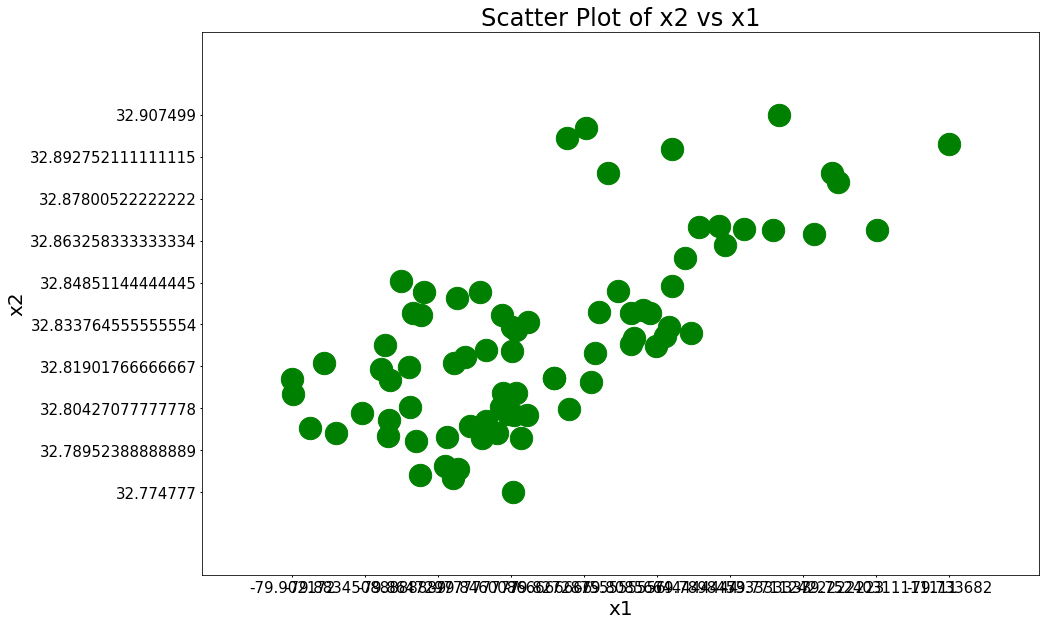

In [22]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

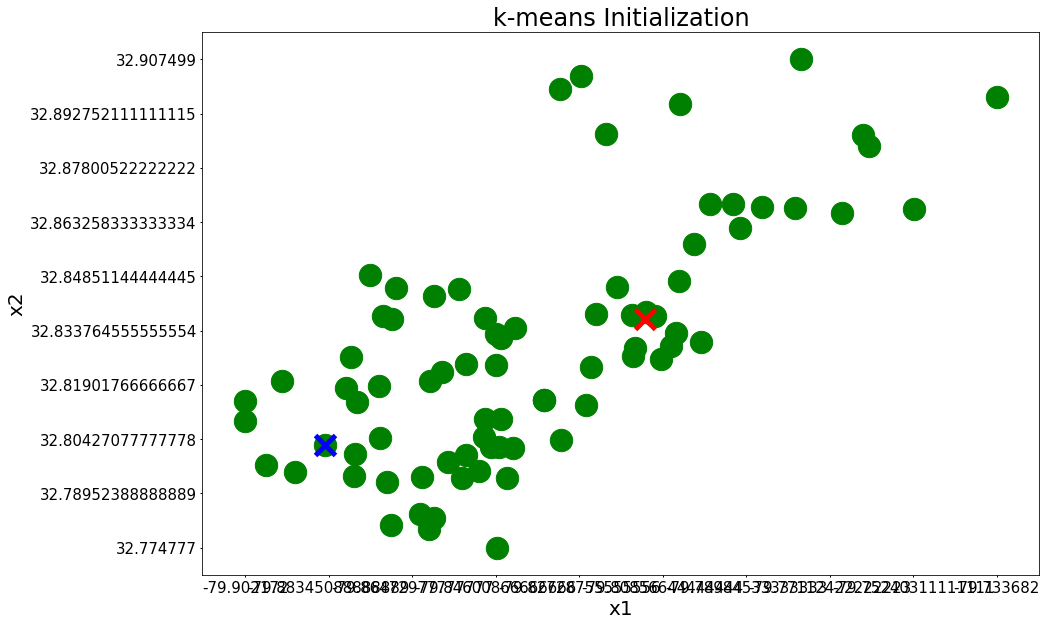

In [24]:
# start with approximate centers
centers = [[-79.884253, 32.802676], [-79.812506, 32.836903]]

plot_points(centers, figure_title='k-means Initialization')

Iteration 1 - Press Enter to update the members of each cluster


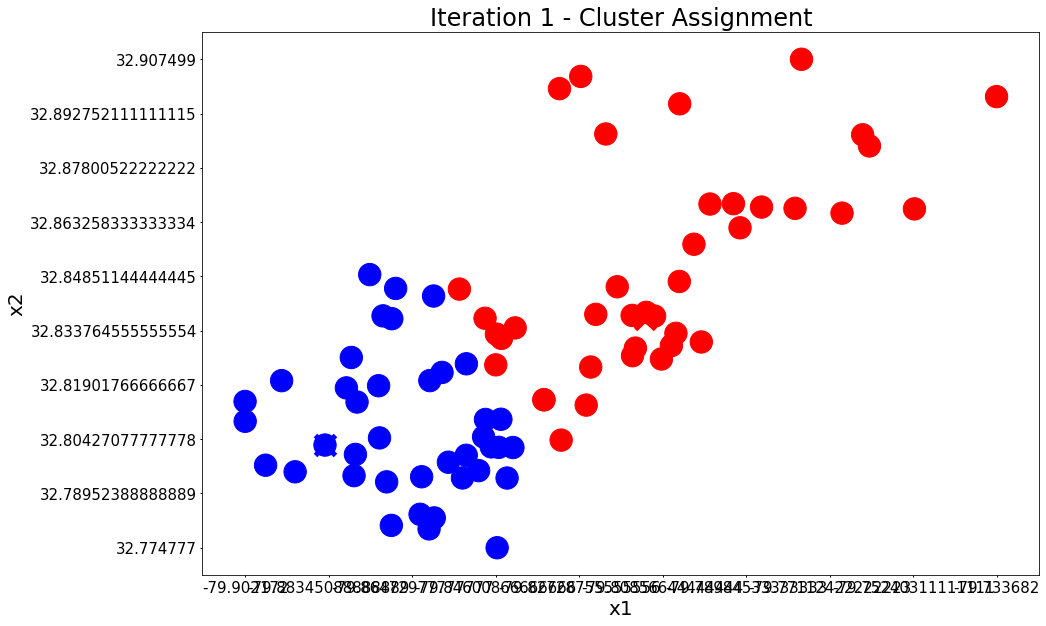

Iteration 1 - Press Enter to update the centers


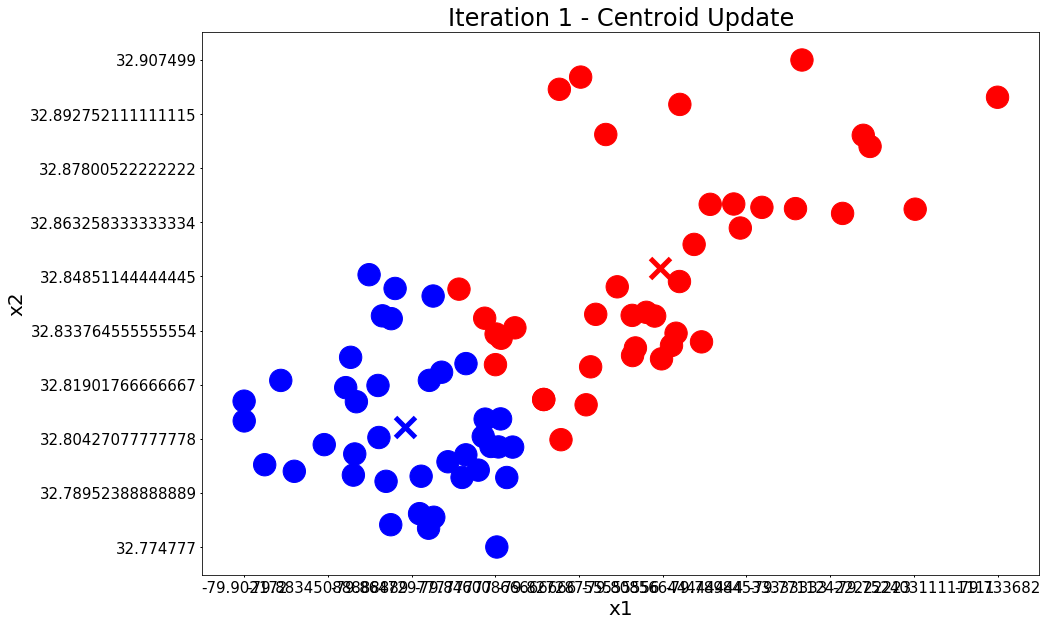

[[-79.86624082051283, 32.807595], [-79.80920761538461, 32.850789538461534]]
Iteration 2 - Press Enter to update the members of each cluster


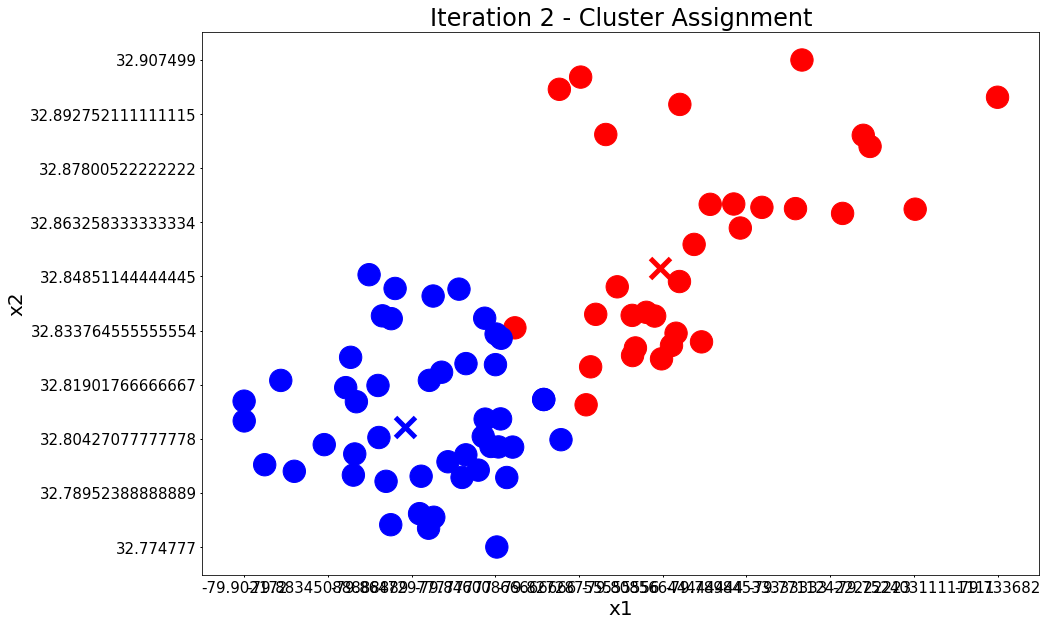

Iteration 2 - Press Enter to update the centers


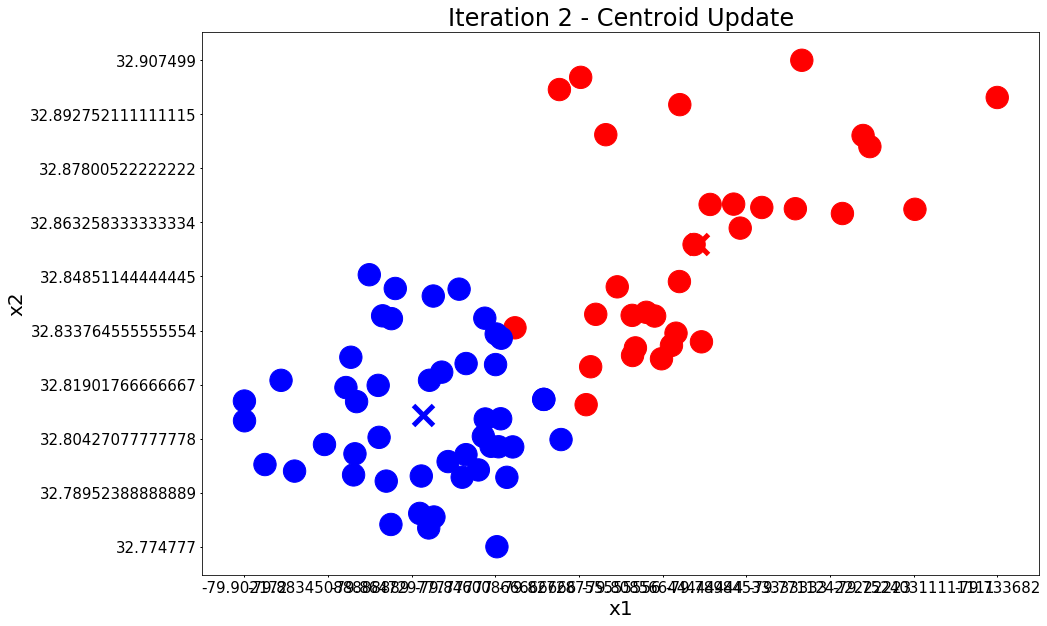

[[-79.86221268085109, 32.81066642553191], [-79.80059654838709, 32.85727983870968]]
Iteration 3 - Press Enter to update the members of each cluster


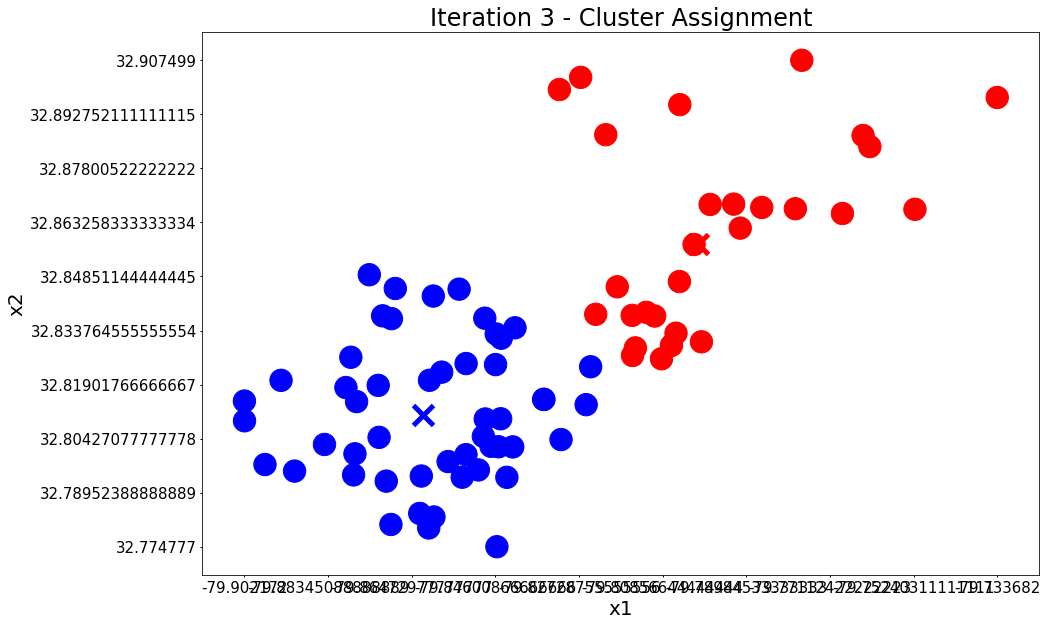

Iteration 3 - Press Enter to update the centers


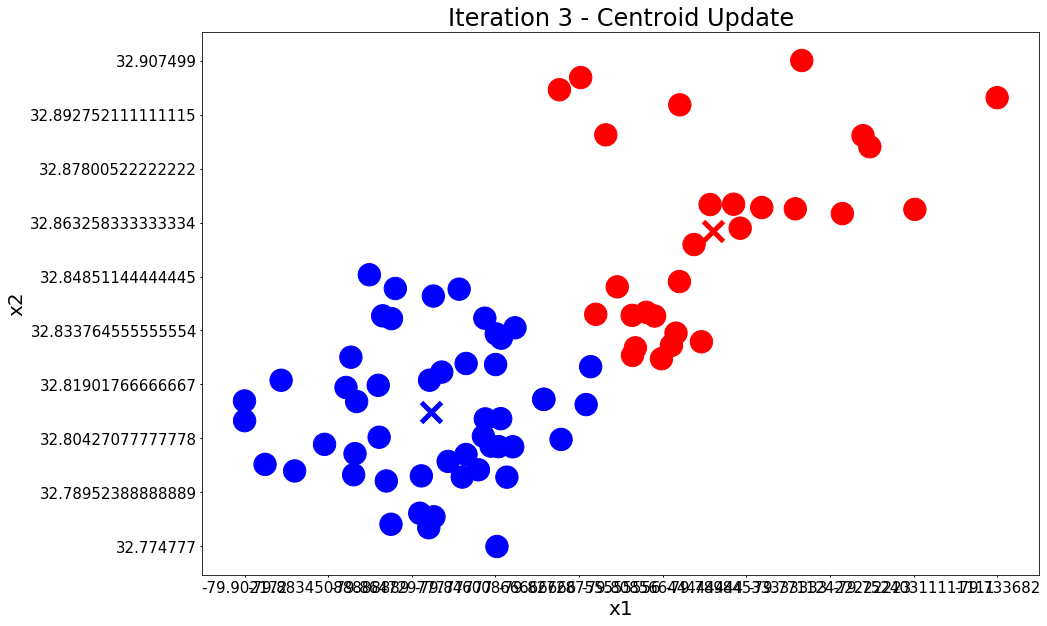

[[-79.86031956, 32.8114649], [-79.79737539285715, 32.86084828571428]]
Iteration 4 - Press Enter to update the members of each cluster


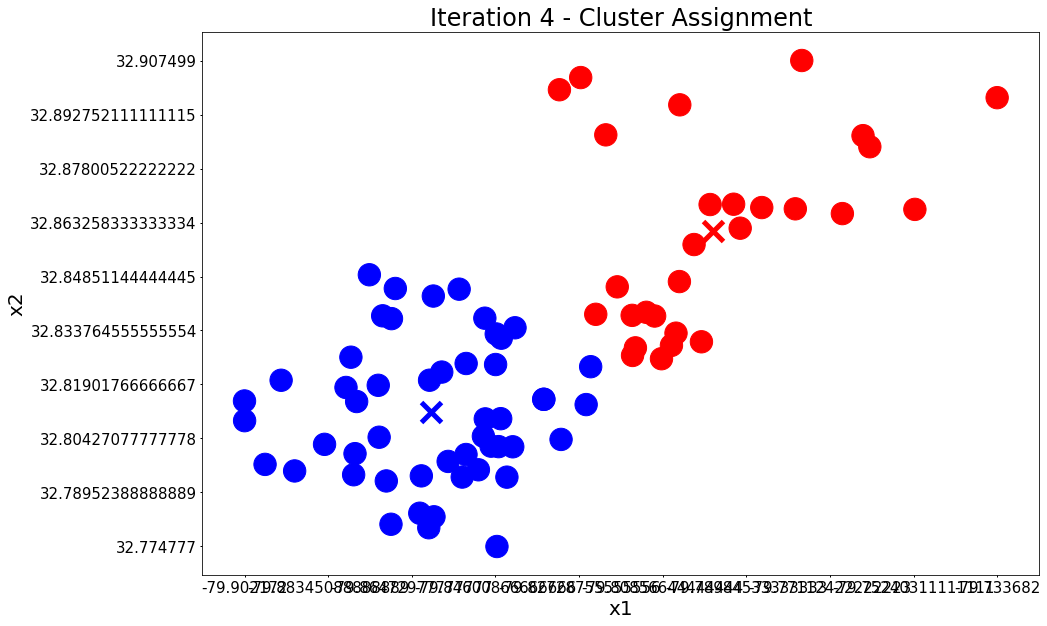

Iteration 4 - Press Enter to update the centers


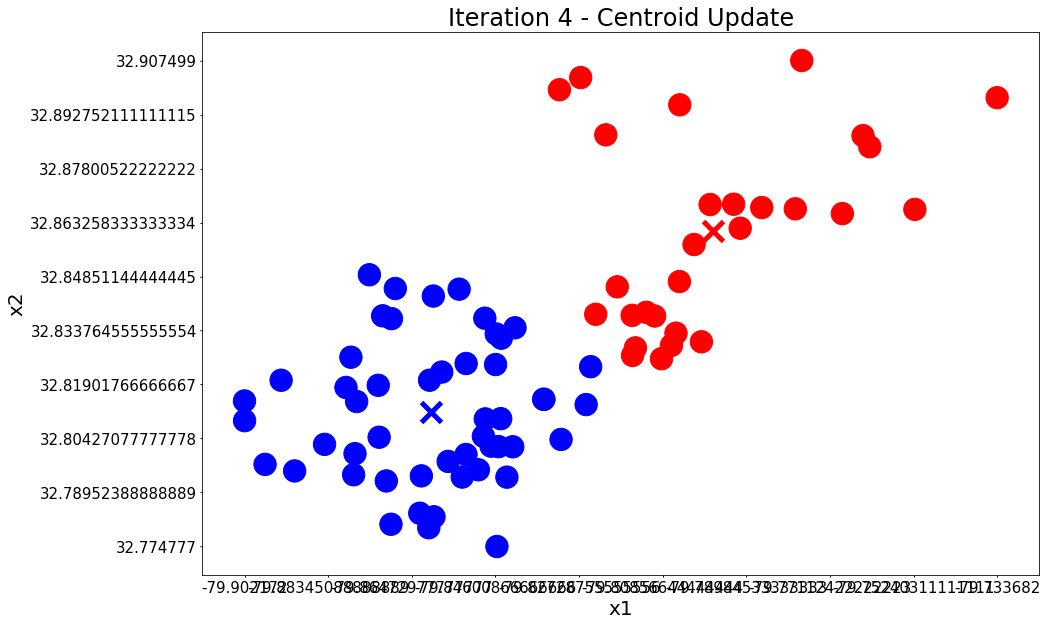

[[-79.86031956, 32.8114649], [-79.79737539285715, 32.86084828571428]]


In [25]:
# iterate to refine centers
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    print(centers)

In [26]:
# Import cleaned data with complete and correct GPS coordinates of neighborhoods
df4 = pd.read_csv('NeighborhoodCentroids1.csv')
df4.rename( columns={'Unnamed: 0':'neighborhoodcentroid'}, inplace=True )
df4 = df4.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis=1)
print(df4)

# generate map centred around the centroid of Mount Pleasant, SC
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the coffee shops as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)   

# add neighborhoods to map
for la,lo, label, in zip(df3.latitude[0:77],df3.longitude[0:77], df3.neighborhoods[0:77]):    
    folium.CircleMarker(
        location=[la, lo],
        radius=5,
        popup=folium.Popup(label, parse_html=True, max_width=100),
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",
    ).add_to(venues_map)    

# add neighborhood centroids
for la,lo, label, in zip(df4.lat[0:2],df4.lng[0:2], df4.neighborhoodcentroid[0:2]):    
    folium.CircleMarker(
        location=[la, lo],
        radius=10,
        popup=folium.Popup(label, parse_html=True, max_width=100),
        color='green',
        fill=True,
        fill_color='green',
    ).add_to(venues_map)    
    
# display map
venues_map


  neighborhoodcentroid        lat        lng
0           NCentroid1  32.811465 -79.860320
1           NCentroid2  32.860848 -79.797375


In [27]:
# data
#x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
#x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

x2=dataframe_filtered['lat']
x1=dataframe_filtered['lng']

print('Datapoints defined!')

Datapoints defined!


In [28]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


In [29]:
# update means
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

assign_members function defined!


In [30]:
# define plot parameters
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    #xticks = np.linspace(-6, 8, 15, endpoint=True)
    #yticks = np.linspace(-6, 6, 13, endpoint=True)

    xticks = np.linspace(-79.902172, -79.733682, 10, endpoint=True)
    yticks = np.linspace(32.774777, 32.907499, 10, endpoint=True)

    #xticks = np.linspace(-80.0, -79.5, 50, endpoint=True)
    #yticks = np.linspace(32.5, 33.0, 50, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


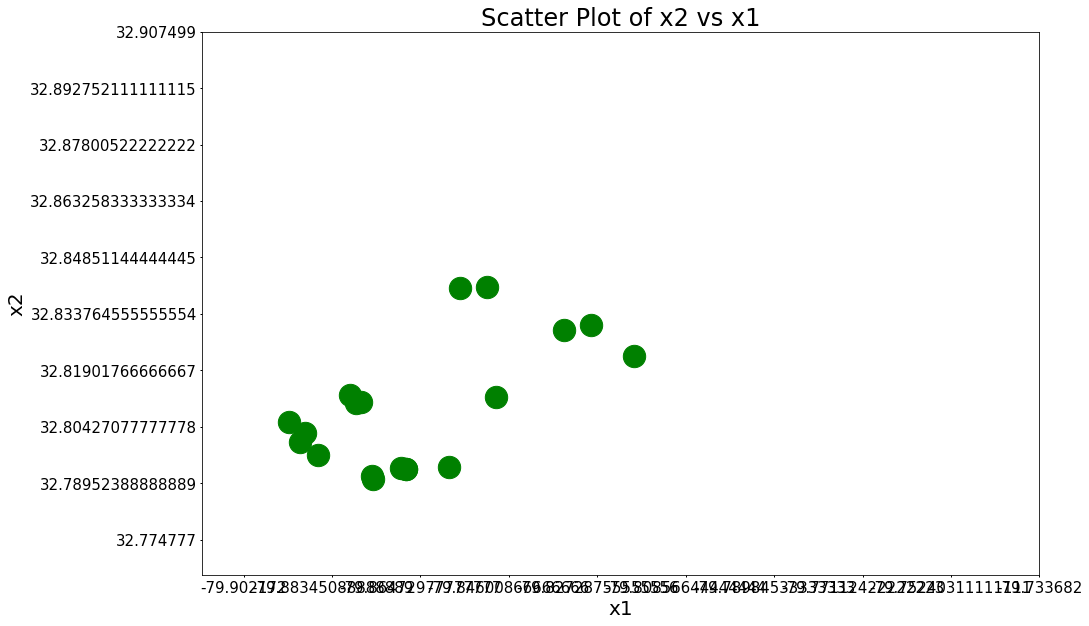

In [31]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

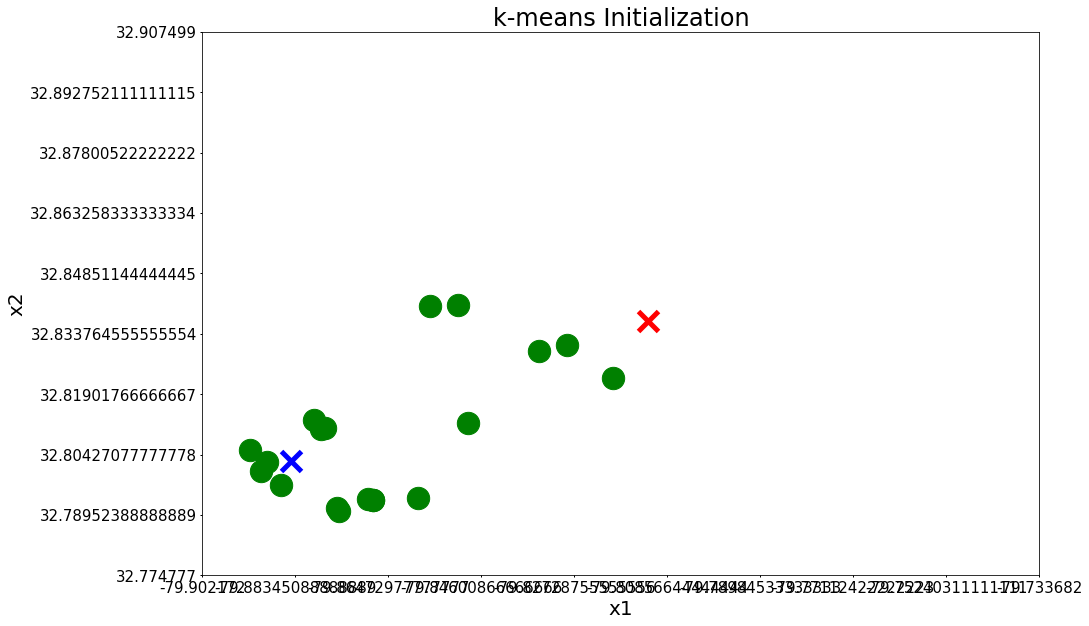

In [32]:
# try approximate center locations
centers = [[-79.884253, 32.802676], [-79.812506, 32.836903]]

plot_points(centers, figure_title='k-means Initialization')

Iteration 1 - Press Enter to update the members of each cluster


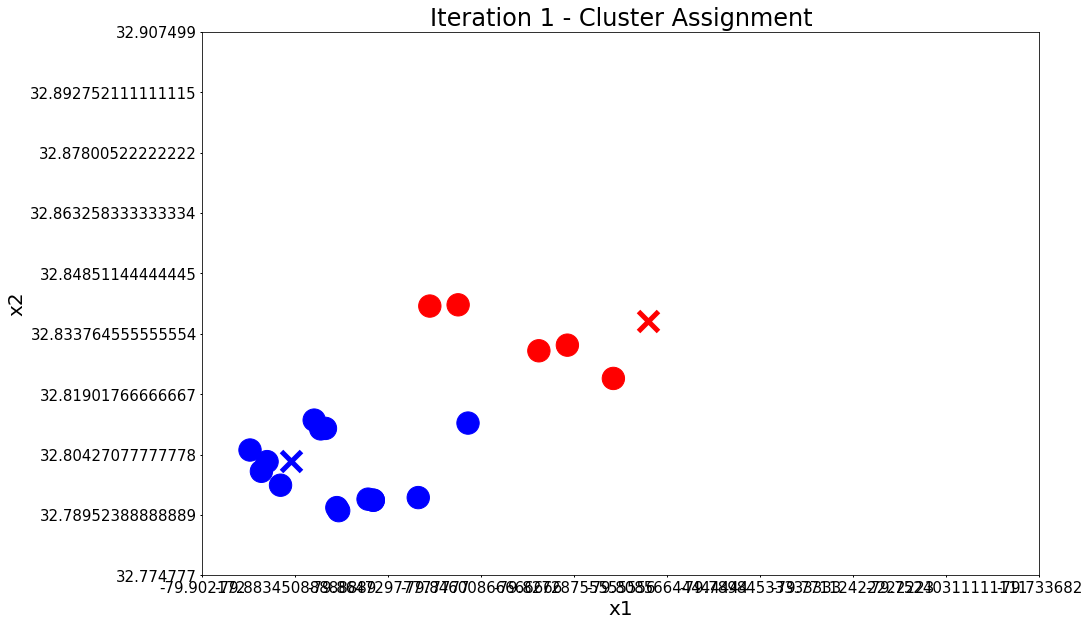

Iteration 1 - Press Enter to update the centers


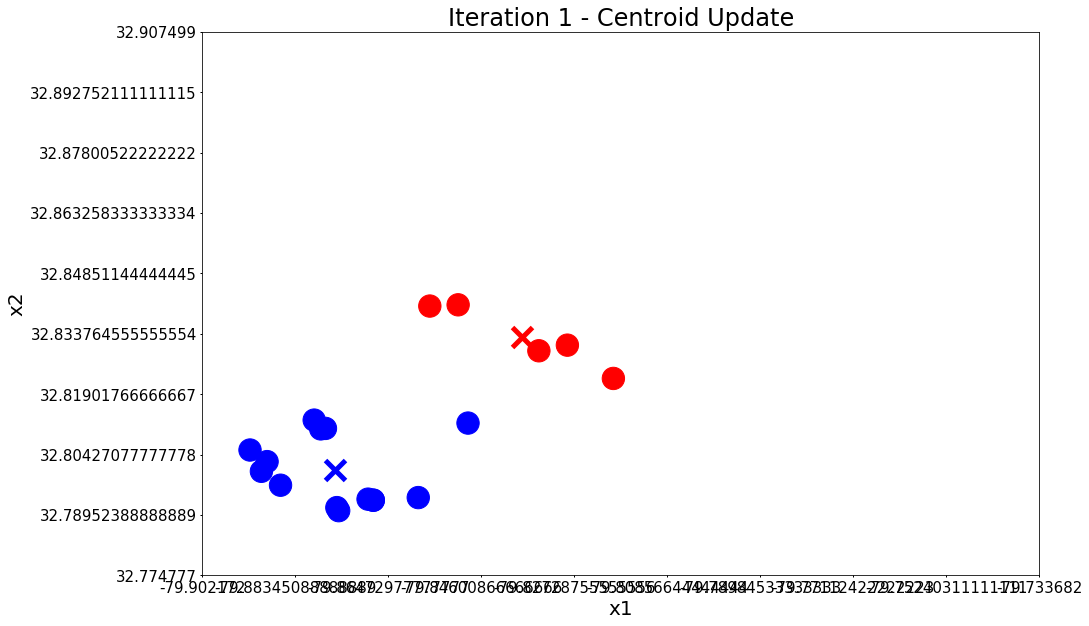

[[-79.87538055533254, 32.800415928821465], [-79.8379189013901, 32.8329463976319]]
Iteration 2 - Press Enter to update the members of each cluster


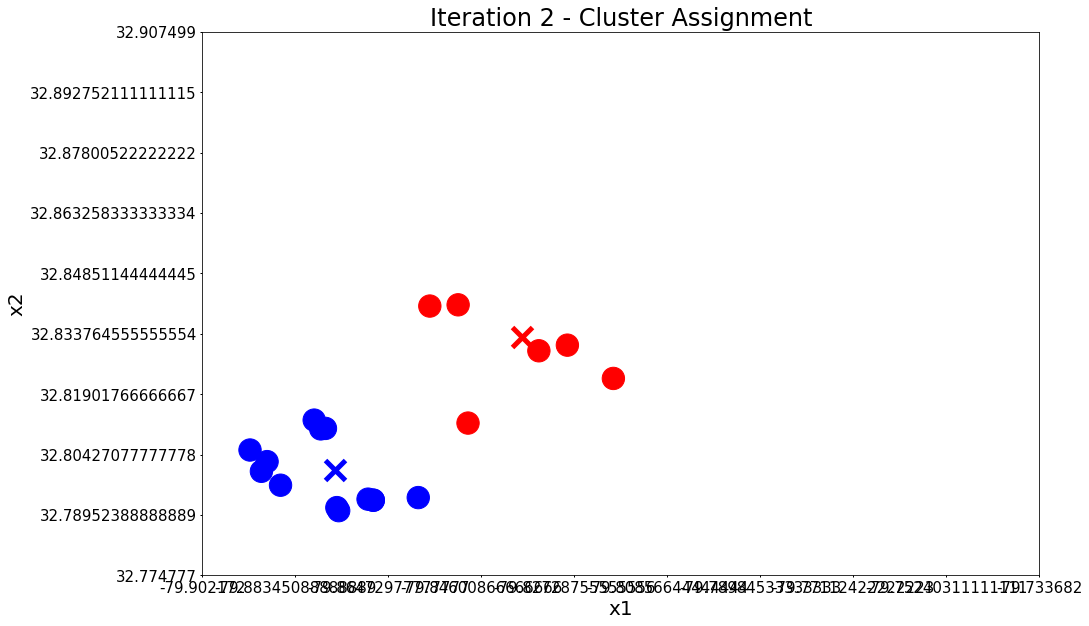

Iteration 2 - Press Enter to update the centers


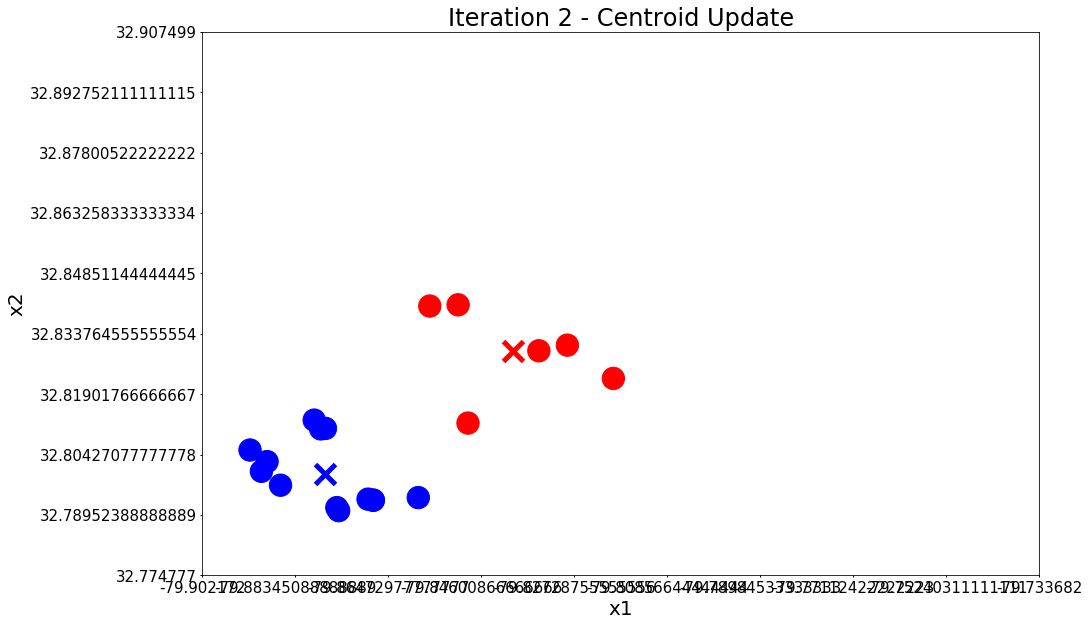

[[-79.87743382881966, 32.79952915411542], [-79.8397137511584, 32.82944599802658]]
Iteration 3 - Press Enter to update the members of each cluster


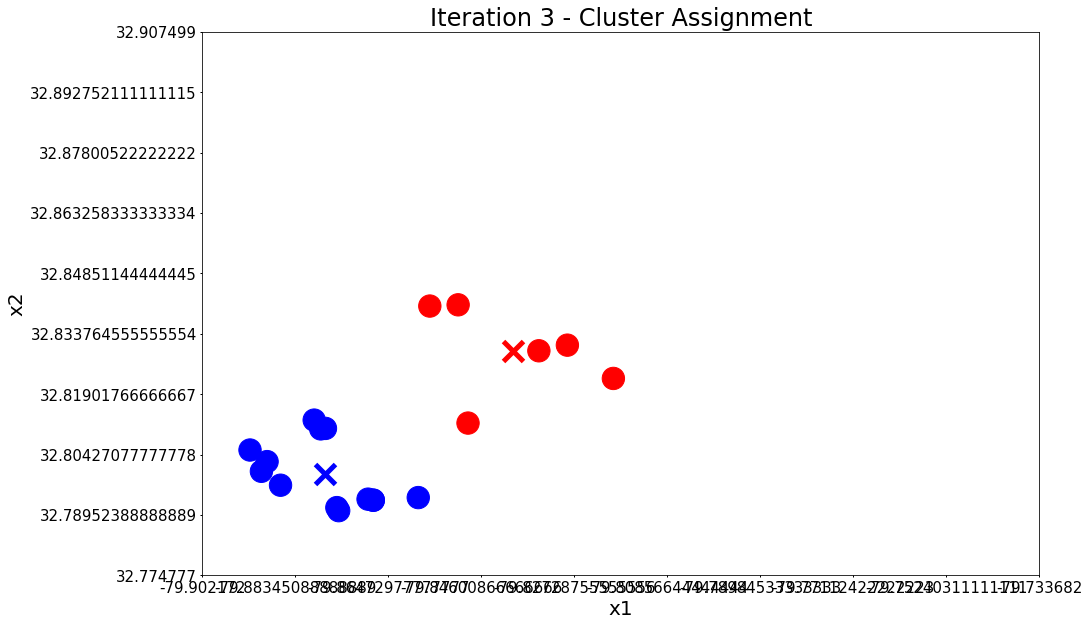

Iteration 3 - Press Enter to update the centers


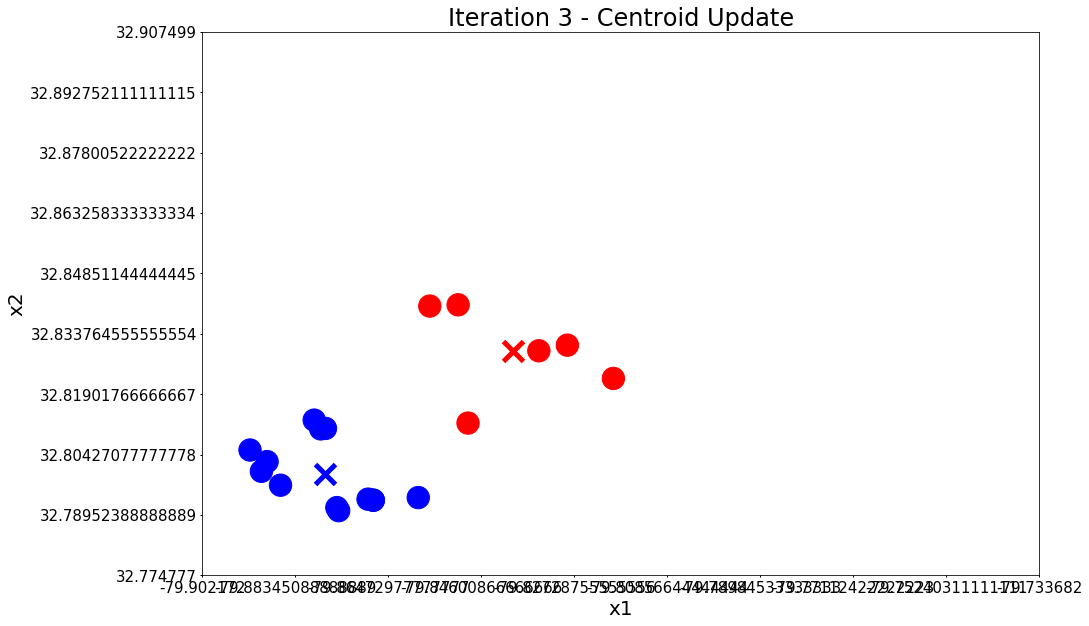

[[-79.87743382881966, 32.79952915411542], [-79.8397137511584, 32.82944599802658]]
Iteration 4 - Press Enter to update the members of each cluster


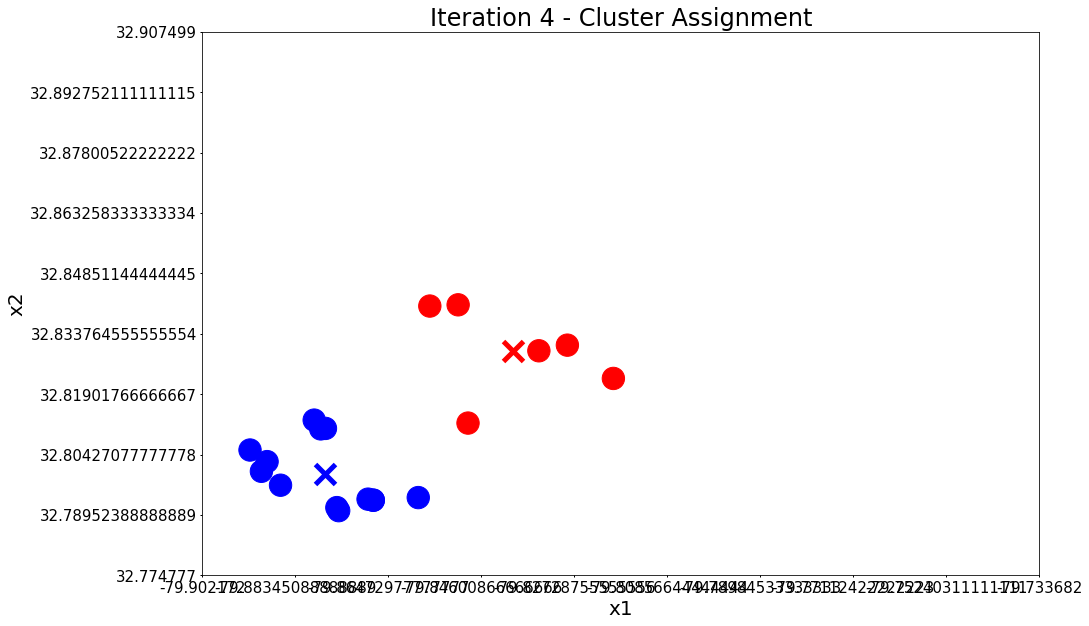

Iteration 4 - Press Enter to update the centers


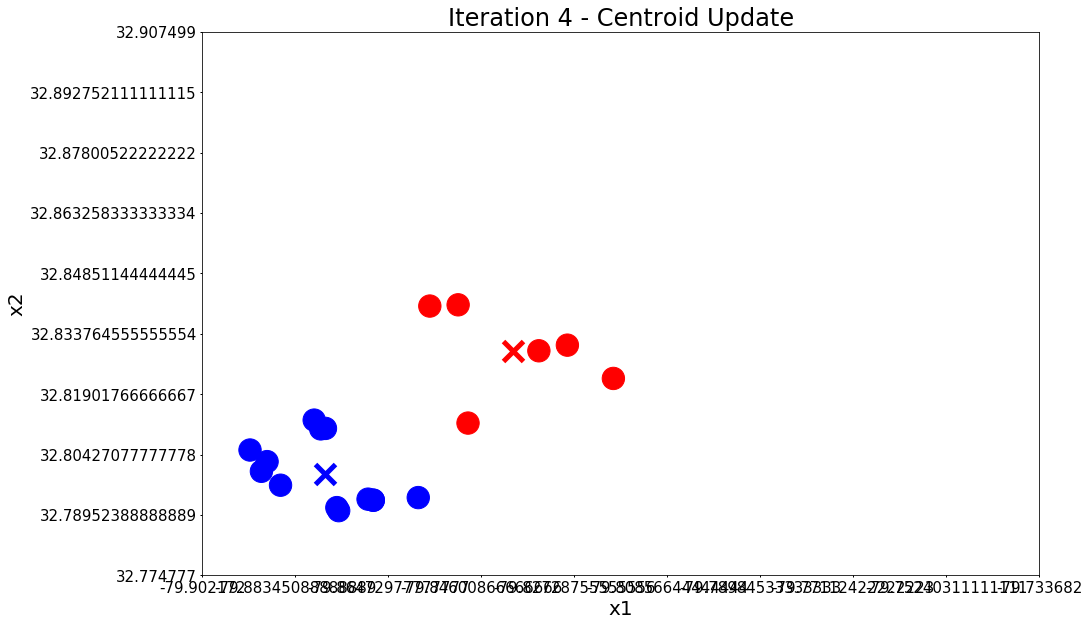

[[-79.87743382881966, 32.79952915411542], [-79.8397137511584, 32.82944599802658]]


In [33]:
# iterate to refine coordinates
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    print(centers)

In [34]:
# Import cleaned data with complete and correct GPS coordinates of neighborhoods
df5 = pd.read_csv('CoffeeCentroids1.csv')
print(df5)

# generate map centred around the centroid of Mount Pleasant, SC
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add the coffee shops as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)   

# add neighborhoods
for la,lo, label, in zip(df3.latitude[0:77],df3.longitude[0:77], df3.neighborhoods[0:77]):    
    folium.CircleMarker(
        location=[la, lo],
        radius=5,
        popup=folium.Popup(label, parse_html=True, max_width=100),
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",
    ).add_to(venues_map)    

# add neighborhood centroids
for la,lo, label, in zip(df4.lat[0:2],df4.lng[0:2], df4.neighborhoodcentroid[0:2]):    
    folium.CircleMarker(
        location=[la, lo],
        radius=10,
        popup=folium.Popup(label, parse_html=True, max_width=100),
        color='green',
        fill=True,
        fill_color='green',
    ).add_to(venues_map)    

# add coffee shop centroids   
for la,lo, label, in zip(df5.lat[0:2],df5.lng[0:2], df5.CoffeeCtrd[0:2]):    
    folium.CircleMarker(
        location=[la, lo],
        radius=10,
        popup=folium.Popup(label, parse_html=True, max_width=100),
        color='orange',
        fill=True,
        fill_color='orange',
    ).add_to(venues_map)    

    
# display map
venues_map

        CoffeeCtrd        lat        lng
0  CoffeeCentroid1  32.799529 -79.877434
1  CoffeeCentroid2  32.829446 -79.839714


# Conclusion
This project showed the power of data science in evaluating real world problems such as helping a client determine the best location of a coffee shop in Mount Pleasant.  Several powerful tools in Python including Beautifulsoup, Geopy, and Foursquare provided powerful means to extract information from websites (i.e., neighborhoods and coffee shops in Mount Pleasant, SC).  K-means clustering tools in Python provided key insight into the relative proximity and density of neighborhoods and existing coffee shops.  In addition, k-means helped determine opportunities where coffee shops could be located relevant to the centroids calculated from k-means.  Finally, Folium provided a very flexible means to plot features and “see” the results of the analysis.  Folium also helped validate the final selection of new coffee shops since one could see these locations in the same context as the existing coffee shops and neighborhoods that might be serviced by new coffee shops.

Two sets of new locations were determined by this analysis.  These include:

- New coffee shop at Highway 17 and Bowman Road,
- New coffee shop at Highway 17 and Anna Knapp Boulevard,
- New coffee shop at Highway 17 and SC Highway 41, and
- New coffee shop at Highway 17 and Hamlin Road.

# Future Directions
Additional analyses that could compliment this approach would include evaluating traffic volumes in all directions especially in the mornings when many consumers would want coffee.  This would inform which side of Highway 17 or Coleman Boulevard might be better for siting a coffee shop based on consumer access.  Another analysis would be to evaluate the population of people in a neighborhood.  This information could be used to weight the neighborhood by the number of potential customers it could provide to a coffee shop in the area or along a commute route.  The neighborhood weighting could be based additionally on additional centroid analyses by subdividing the relative regions of Mount Pleasant.  Traffic route analysis might also be another compliment to the siting of coffee shops since it might provide an indication of access (i.e., people who would rather take a right turn at an intersection (less wait time) versus a left turn (more time).